## Observations and Insights 

As seen in the bar chart 'Number of Measurements per Drug Regimen', the number of measurements taken per drug regimen varies, ranging from 156 to 230 measurements. This is due to the general unevenness of this data set. Aside from the duplicate values for a mouse, which were deleted, there are also missing values, as can be seen in the value counts on the no_dups_df (all the drug regimens) and top_regs_df (the four target drugs). For example, in the Capomulin data within top_regs_df, which shows all the data associated with that drug, there are 25 measurements for time points 0-10, but only 24 measurements for time point 15, and 21 measurements for time point 45. As this study concerns cancers, it is possible that the mice IDs with missing values relate to mice that died before reaching the end time point. If so, that data would still be useful, and should not just be discarded. But as will be discussed later, the number of measurements could possibly skew comparisons of analysis across treatments.  

The boxplots of the four target drug regimens show a marked difference between the final average tumor volume of Ramicane and Capomulin, and Infobinol and Ceftamin. Each mouse in the study started with the same tumor volume (see start_values_df output), so the difference in end values across the four regimens could suggest a difference in efficacy in reducing tumor size, with Ramicane and Capomulin being more successful, since they reduced average tumor size from 45 mm3 to 36.56 and 38.13 mm3 respectively. However, as mentioned above, not all mouse IDs have the same endpoint. The distribution of end point values in each regimen show that the majority of values for Ramicane and Capomulin are at timepoint 45, while less than half of the values for Infobinol and Ceftamin are from timepoint 45. Given that those regimens have more values from earlier end points, it makes sense that those regimens would show larger tumor measurements, even if they were equally as effective in tumor reduction. However, if looking at only the data with endpoint 45, the values for Infobinol and Ceftamin still remain higher (65.76 and 64.13) than those for Ramicane and Capomulin (34.96, 36.24), suggesting that Infobinol and Ceftamin may in fact be less effective in tumor reduction. Furthermore, the large amounts of lower endpoint values, if those do represent mouse deaths, could suggest that not only are they ineffective in reducing tumor size, the tumors on those regimens appear to conduce towards death. The sample sizes are small (25 values for each regimen), so repetition of this study with more research subjects is recommended. 

Conducting a quantile analysis on the final tumor volumes of the four target treatments only exposed one potential outlier, which was in the Infubinol regime. The data point was approximately 36.321 mm3, which is about 0.5 mm3 under the lower bound. The data point was from a mouse ID that ended at time point 5; other mouse IDs that ended at timepoint 5 also show lower values (in the 40s mm3), although not as low as the potential outlier. This data point being identified as a possible outlier shows the problems of comparing data points at different time points: while they are all end points, they are different stages in a progression. Nonetheless, the 36.321 mm3 still stands apart from the other data points within the Infubinol set, even if comparing only those values that end at time point 5. Given the other errors in the data set (duplicate values), the 36.321 mm3 value could be a mis-entry, or it could be from a mouse with a serious cancer yet small tumors that died. 

There appears to be a strong positive correlation between average tumor volume and mouse weight in the Capomulin regimen: as mouse weight increases, the tumor's weight also increases. One might think that tumors generally take up the same proportion of an animal's body, so it would make sense for the tumor volume to rise along with the mouse weight. However, if the same linear regression is done for the other three regimens, the same relationship is not consistently seen. For Ramicane, there is a similarly strong positive correlation between tumor volume and mouse weight; for Infubinol, there appears to be a weak negative correlation (correlation coefficient: -0.368); but for Ceftamin there seems to be very little liklihood of a correlation (the correlation coefficient is very low, approx. 0.0006). The number of values for the Infubinol and Ceftamin subsets for tumor volume vs. weight are smaller than the Capomulin and Ramicane ones by about 50 values: it could be that the shorter subsets made the extreme values have more of an effect on the linear regression, causing the representation of any possible correlation to be weaker. Although all four data sets have at least 170 values, the averages per weight amount are what is being graphed, leading to there only being 9 points graphed for Ramicane and Capomulin, and 7 for Infobinol and Ceftamin, which furthermore amplifies the effect of the difference in data set numbers. The Infobinol and Ceftamin subsets have the same number of values, however, so comparison between those two could be more fruitful. In fact, there is a correlation difference between the two, albeit a weak one; potentially the negative correlation between mouse weight and tumor volume under Infubinol could suggest that Infubinol is more effective on heavier mice. Perhaps more potentially likely is that the two data sets are too small to discern any trends, and that Capomulin and Ramicane graphs are showing a normal relationship between tumor volume and mouse weight.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from IPython.display import HTML 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
#finding the intital tumor volume for all mice
start_values_df = merged_df[merged_df['Timepoint'] == 0]
start_values_df['Tumor Volume (mm3)'].value_counts()

45.0    250
Name: Tumor Volume (mm3), dtype: int64

In [12]:
#renaming the col Timepoint to reflect what unit it uses
merged_df = merged_df.rename(columns={'Timepoint': 'Timepoint (Days)'})
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint (Days),Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Creating a list of all unique mice IDs
unique_mice_list = merged_df['Mouse ID'].unique()
num_unique_mice = len(unique_mice_list)
num_unique_mice

249

In [14]:
#creating a new df to clean
no_dups_df = merged_df.copy()

In [15]:
# finding any duplicate mice
# empty lists to hold the index number and the ID of the duplicate mice
dup_index = []
dup_mice = []
#defining a function to get the mice
def duplicate_checker_dups(mID):
    #mask to filter for each mouse ID in the unique list
    only_mID = merged_df[merged_df['Mouse ID'] == mID]
    #calling .duplicated on the Timepoint column
    dups = only_mID.duplicated(subset='Timepoint (Days)')
    #finding how long the duplicate list is
    end_index = len(dups)
    #populating the dup_index with the indicies
    global dup_index
    dup_index = dups[dups == True].index[0: end_index]
    #for loop to find the duplicate mice rows
    for n in dup_index:
        #appending duplicate mice to the dup_mice list only if they aren't in there already, so will make only unique mice
        a_dup_mouse = merged_df.iloc[n, 0]
        if a_dup_mouse not in dup_mice:
            dup_mice.append(a_dup_mouse)
        #dropping the mice from the df for cleaning
        global no_dups_df
        no_dups_df.drop(n, inplace=True)
#calling the function on the unique mice list
for x in unique_mice_list:
    duplicate_checker_dups(x)
print(f'number of mice in the duplicates list: {len(dup_mice)}')

number of mice in the duplicates list: 1


In [16]:
no_dups_df['Timepoint (Days)'].value_counts()

0     249
5     237
10    222
15    206
20    194
25    183
30    171
35    154
40    142
45    130
Name: Timepoint (Days), dtype: int64

In [17]:
html = no_dups_df.to_html()
  
# write html to file 
text_file = open("data.html", "w") 
text_file.write(html) 
text_file.close() 

In [9]:
#printing duplicate mouse info - only one mouse had duplicates 
for mouse in dup_mice:
    print(f'duplicate mouse ID: {mouse}')
    dup_mouse_info = no_dups_df[no_dups_df['Mouse ID'] == mouse]
dup_mouse_info

duplicate mouse ID: g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint (Days),Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [10]:
# Checking the number of mice in the clean DataFrame.
#checking length of new df mouse list
unique_mice_list_new = no_dups_df['Mouse ID'].unique()
num_unique_mice_new = len(unique_mice_list_new)

#old list
original_mice_list = merged_df['Mouse ID'].unique()
num_original_mice = len(original_mice_list)
num_unique_mice_new, num_original_mice

(249, 249)

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
avg_tumour_size = no_dups_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename('mean tumor vol') 

median_tumour_size = no_dups_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().rename('median tumor vol')

var_tumour = no_dups_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(ddof=0).rename('variance tumor vol')

std_tumour = no_dups_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(ddof=0).rename('st.dev tumor vol')

#SEM is unbiased standard error of the mean
sem_tumour = no_dups_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(ddof=0).rename('SEM tumor vol')

summary_df = pd.concat([avg_tumour_size, median_tumour_size, var_tumour, std_tumour, sem_tumour], axis=1)
summary_df

,mean tumor vol,median tumor vol,variance tumor vol,st.dev tumor vol,SEM tumor vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.393463,50.909965,42.862273,6.546928,0.524174
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summstats = no_dups_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns = {'mean': 'mean tumor vol', 'median': 'median tumor vol', 'var': 'variance tumor vol', 'std': 'st.dev tumor vol', 'sem': 'SEM tumor vol'})
summstats

,mean tumor vol,median tumor vol,variance tumor vol,st.dev tumor vol,SEM tumor vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Measurements'>

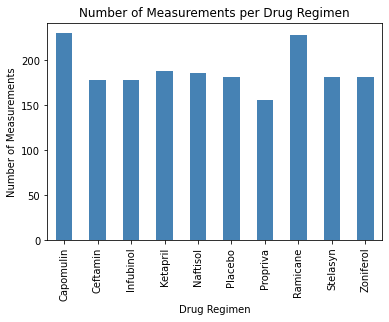

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#groupby for Drug Regimen
no_dups_df_grouped = no_dups_df.groupby('Drug Regimen')
#applying a count on the drug regiment column and renaming columns to be more descriptive
num_measurements_df = pd.DataFrame(no_dups_df_grouped['Drug Regimen'].count()).rename(columns=({'Drug Regimen': 'Number of Measurements'}))

num_measurements_df.plot(kind='bar', title='Number of Measurements per Drug Regimen', color='steelblue', legend=None, ylabel='Number of Measurements')

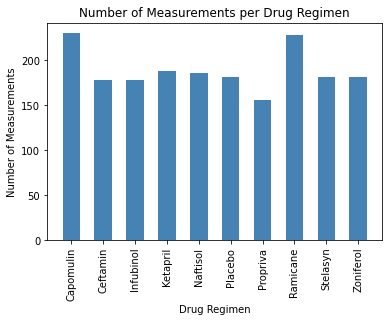

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#index is the names of the regimens, so x axis is the index of the df
# y is the number of measurements column
x_axis = num_measurements_df.index
y_axis = num_measurements_df['Number of Measurements']

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.title('Number of Measurements per Drug Regimen')
plt.bar(x_axis, y_axis, width=0.55, color='steelblue')
plt.xticks(x_axis, rotation=90)

plt.savefig('measurements_per_regimen.png', bbox_inches = "tight")
plt.show()

In [15]:
#calculating the range in the number of values
print(f'Lowest number of measurements: {num_measurements_df.min()}')
print(f'Highest number of measurements: {num_measurements_df.max()}')
num_measurements_df.describe()

Lowest number of measurements: Number of Measurements    156
dtype: int64
Highest number of measurements: Number of Measurements    230
dtype: int64


,Number of Measurements
count,10.000000
mean,188.800000
std,22.899782
min,156.000000
25%,178.750000
50%,181.500000
75%,187.500000
max,230.000000


<AxesSubplot:title={'center':'Gender Distribution of Mice in Experiment'}>

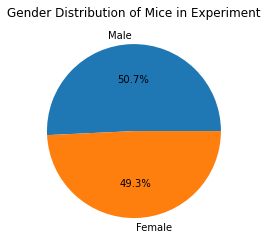

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = no_dups_df['Sex'].value_counts()
#axes don't need to be labelled, just the values, so label = ''
mice_sex.plot(kind='pie', title='Gender Distribution of Mice in Experiment', autopct='%1.1f%%', label='')

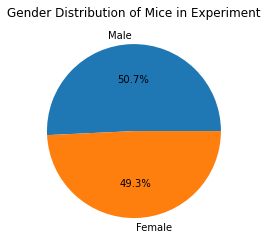

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = mice_sex
labels = mice_sex.index

plt.pie(mice_sex, labels=labels, autopct='%1.1f%%')
plt.title('Gender Distribution of Mice in Experiment')
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
no_dups_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint (Days),Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse 
#applying a mask only for the 4 drugs we want and saving that mask to a new df
top_drugs_df = no_dups_df[no_dups_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

#grouping that df by mouse ID, finding max timepoint for each ID
mIDgroup_df = top_drugs_df.groupby('Mouse ID')['Timepoint (Days)'].max()

#empty lists for appending mouse IDs and last timepoint
mIDlist = [x for x in mIDgroup_df.index]
lasttimelist = [x for x in mIDgroup_df]

#empty lists for appending the name of the regime and tumour vol per mouseID/last time    
regime_names = []
tumour_vols = []

#function to append to empty lists
def get_regimen_tumour(name, day):
    regime_names.append(top_drugs_df[(top_drugs_df['Mouse ID'] == name) & (top_drugs_df['Timepoint (Days)'] == day)]['Drug Regimen'].to_string(index=False)[1:])
    tumour_vols.append(float(top_drugs_df[(top_drugs_df['Mouse ID'] == name) & (top_drugs_df['Timepoint (Days)'] == day)]['Tumor Volume (mm3)'].to_string(index=False)))
# calling the function for each mouse ID
for x in range(0, (len(mIDlist))):
    mid = mIDlist[x]
    time = lasttimelist[x]
    get_regimen_tumour(mid, time) 

#combining the series to make a new df
top_regimes_df = pd.DataFrame({'Mouse ID': mIDlist, 'Last Time': lasttimelist, 'Drug Regimen': regime_names, 'Tumor Volume (mm3)': tumour_vols})
top_regimes_df.sample(10)

,Mouse ID,Last Time,Drug Regimen,Tumor Volume (mm3)
43,l471,45,Ceftamin,67.748662
39,k210,45,Ceftamin,68.923185
18,c895,30,Infubinol,60.969711
93,y163,45,Infubinol,67.685569
62,q597,45,Ramicane,45.220869
36,j296,45,Ceftamin,61.849023
33,i738,45,Capomulin,37.311846
48,l733,45,Ceftamin,64.299830
69,s121,25,Infubinol,55.650681
88,w914,45,Capomulin,36.041047


In [20]:
# observing the different number of values at each timepoint, for each of the top 4 drugs
#use groupby (to separate out each drug) and .value_counts()
top_regs = top_drugs_df.groupby('Drug Regimen')
top_regs['Timepoint (Days)'].value_counts()

Drug Regimen  Timepoint (Days)
Capomulin     0                   25
              5                   25
              10                  25
              15                  24
              20                  23
              25                  22
              30                  22
              35                  22
              40                  21
              45                  21
Ceftamin      0                   25
              5                   21
              10                  20
              15                  19
              20                  18
              25                  18
              30                  16
              35                  14
              40                  14
              45                  13
Infubinol     0                   25
              5                   25
              10                  21
              15                  21
              20                  20
              25                  18
       

In [21]:
#test of the values that have 45 mm3 as their last tumour vol - they all have T0 as their only data point
idformask = ['b447', 't573', 'u153','x226']

for testid in idformask:
    mask2 = no_dups_df['Mouse ID'] == testid
    test_df = no_dups_df.loc[mask2, :]
    print(f"Mouse ID: {test_df['Mouse ID'].to_string(index=False)}, Timepoint: {test_df['Timepoint (Days)'].to_string(index=False)}")

Mouse ID:  b447, Timepoint:  0
Mouse ID:  t573, Timepoint:  0
Mouse ID:  u153, Timepoint:  0
Mouse ID:  x226, Timepoint:  0


In [22]:
#creating new dfs for each treatment
#masking the top_regimes_df for each drug regime name
#treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

ca_df = pd.DataFrame(top_regimes_df[top_regimes_df['Drug Regimen'] == 'Capomulin'])
ra_df = pd.DataFrame(top_regimes_df[top_regimes_df['Drug Regimen'] == 'Ramicane'])
in_df = pd.DataFrame(top_regimes_df[top_regimes_df['Drug Regimen'] == 'Infubinol'])
ce_df = pd.DataFrame(top_regimes_df[top_regimes_df['Drug Regimen'] == 'Ceftamin'])

In [23]:
# printing what are the last timepoints for mice on each drug regimen, and how many mice at each
print(ca_df['Last Time'].value_counts())
print(len(ca_df))
ca_df

45    21
20     1
15     1
10     1
35     1
Name: Last Time, dtype: int64
25


,Mouse ID,Last Time,Drug Regimen,Tumor Volume (mm3)
9,b128,45,Capomulin,38.982878
12,b742,45,Capomulin,38.939633
24,f966,20,Capomulin,30.485985
25,g288,45,Capomulin,37.074024
26,g316,45,Capomulin,40.159220
32,i557,45,Capomulin,47.685963
33,i738,45,Capomulin,37.311846
34,j119,45,Capomulin,38.125164
35,j246,35,Capomulin,38.753265
45,l509,45,Capomulin,41.483008


In [24]:
# seeing what the mean would be if only looking at mice that went through all the timepoints
mask_45 = ca_df['Last Time'] == 45
ca_45_ends = ca_df.loc[mask_45, :]
ca_45_ends.mean()

Last Time             45.000000
Tumor Volume (mm3)    36.236114
dtype: float64

In [25]:
print(ra_df['Last Time'].value_counts())
print(len(ra_df))
ra_df

45    20
30     2
15     1
5      1
35     1
Name: Last Time, dtype: int64
25


,Mouse ID,Last Time,Drug Regimen,Tumor Volume (mm3)
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543
5,a520,45,Ramicane,38.810366
7,a644,45,Ramicane,32.978522
16,c458,30,Ramicane,38.342008
17,c758,45,Ramicane,33.397653
19,d251,45,Ramicane,37.311236
21,e662,45,Ramicane,40.659006
27,g791,45,Ramicane,29.128472
29,i177,45,Ramicane,33.562402


In [26]:
mask_45 = ra_df['Last Time'] == 45
ra_45_ends = ra_df.loc[mask_45, :]
ra_45_ends.mean()

Last Time             45.000000
Tumor Volume (mm3)    34.955595
dtype: float64

In [27]:
print(in_df['Last Time'].value_counts())
print(len(in_df))
in_df

45    9
30    5
5     4
20    2
35    2
25    1
15    1
40    1
Name: Last Time, dtype: int64
25


,Mouse ID,Last Time,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
6,a577,30,Infubinol,57.031862
8,a685,45,Infubinol,66.083066
14,c139,45,Infubinol,72.226731
15,c326,5,Infubinol,36.321346
18,c895,30,Infubinol,60.969711
20,e476,45,Infubinol,62.435404
22,f345,45,Infubinol,60.918767
31,i386,40,Infubinol,67.289621


In [28]:
mask_45 = in_df['Last Time'] == 45
in_45_ends = in_df.loc[mask_45, :]
in_45_ends.mean()

Last Time             45.000000
Tumor Volume (mm3)    65.755562
dtype: float64

In [29]:
print(ce_df['Last Time'].value_counts())
print(len(ce_df))
ce_df

45    13
0      4
30     2
25     2
15     1
10     1
40     1
5      1
Name: Last Time, dtype: int64
25


,Mouse ID,Last Time,Drug Regimen,Tumor Volume (mm3)
2,a275,45,Ceftamin,62.999356
10,b447,0,Ceftamin,45.000000
11,b487,25,Ceftamin,56.057749
13,b759,30,Ceftamin,55.742829
23,f436,15,Ceftamin,48.722078
28,h531,5,Ceftamin,47.784682
36,j296,45,Ceftamin,61.849023
39,k210,45,Ceftamin,68.923185
43,l471,45,Ceftamin,67.748662
44,l490,30,Ceftamin,57.918381


In [30]:
mask_45 = ce_df['Last Time'] == 45
ce_45_ends = ce_df.loc[mask_45, :]
ce_45_ends.mean()

Last Time             45.000000
Tumor Volume (mm3)    64.132421
dtype: float64

In [31]:
# finding quartiles, iqr, upper and lower bounds, potential outliers
# lists of treatments and dfs, empty outlier list
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
df_list = [ca_df, ra_df, in_df, ce_df]
outlier_list = []

#defining a function to find the quartiles etc.
for x in range(0, len(df_list)):
    treatment_name = treatments[x]
    reg_df = df_list[x]
    quants = reg_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    q1 = quants.iloc[0]
    reg_mean = quants.iloc[1]
    q3 = quants.iloc[2]
    iqr = q3 - q1
    upperbound = q3 + (1.5 * iqr)
    lowerbound = q1 - (1.5 * iqr)
    print(f'{treatment_name}:')
    print(quants)
    print(f'Q1: {q1}, Q3: {q3}')
    print(f'iqr: {iqr}')
    print(f'lower bound: {lowerbound}, upper bound: {upperbound}')
    #masking for values falling outside the upper/lower bound
    mask = (reg_df ["Tumor Volume (mm3)"] > upperbound) | (reg_df ["Tumor Volume (mm3)"] < lowerbound)
    outliers = reg_df.loc[mask, :] 
    #appending results of the mask to the outlier_list
    outlier_list.append(outliers)
    print(f'Potential outliers for {treatment_name} would be below {lowerbound} or above {upperbound}. There are {len(outliers)} potential outliers in the dataset.')
    print('__________________________')
# removing empty data frames from the outlier list
non_zero_outlier_list = [df for df in outlier_list if len(df) > 0]
print('Outlier Summary:')
# printing mouse ID and tumour vol for any potential outlier values
for df in non_zero_outlier_list:
    print(f"Outliers in {df['Drug Regimen'].to_string(index=False)}:")
    for x in range(0, len(df)):
        print(f'mouse ID: {df.iloc[x, 0]}, tumor volume: {df.iloc[x, 3]}')

Capomulin:
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
Q1: 32.377357, Q3: 40.15922
iqr: 7.781862999999994
lower bound: 20.704562500000012, upper bound: 51.832014499999985
Potential outliers for Capomulin would be below 20.704562500000012 or above 51.832014499999985. There are 0 potential outliers in the dataset.
__________________________
Ramicane:
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
Q1: 31.56047, Q3: 40.659006
iqr: 9.098536
lower bound: 17.912666, upper bound: 54.30681
Potential outliers for Ramicane would be below 17.912666 or above 54.30681. There are 0 potential outliers in the dataset.
__________________________
Infubinol:
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
Q1: 54.048608, Q3: 65.525743
iqr: 11.477135000000004
lower bound: 36.832905499999995, upper bound: 82.74144550000001
Potential outliers for Infubinol would be 

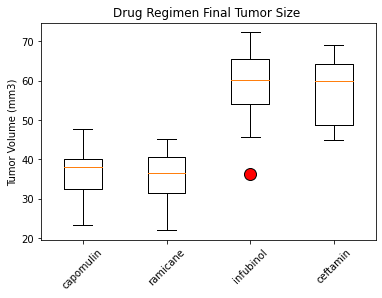

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'

# getting third column from each of the last value regime specific dfs (tumour vols)
ca_xaxis = ca_df.iloc[:, 3]
ra_xaxis = ra_df.iloc[:, 3]
in_xaxis = in_df.iloc[:, 3]
ce_xaxis = ce_df.iloc[:, 3]
# creating a dictionary to hold the different plots and their names
regimens_dict = {'capomulin': ca_xaxis, 'ramicane': ra_xaxis, 'infubinol': in_xaxis, 'ceftamin': ce_xaxis}

# applying formatting to the outliers
styling_outliers = dict(markerfacecolor='red', marker='o', markersize=12)
# calling subplots in order to plot all four boxplots on a figure
fig, ax = plt.subplots()
ax.boxplot(regimens_dict.values(), flierprops=styling_outliers)
ax.set_xticklabels(regimens_dict.keys(), rotation=45)
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Drug Regimen Final Tumor Size ')

plt.savefig('final_tumor_size_boxplot.png', bbox_inches = "tight")
plt.show()

## Line Plot

In [33]:
#list comprehension to get all the mice on the Capomulin regime
listcamice = [value for value in ca_df.iloc[: , 0]]

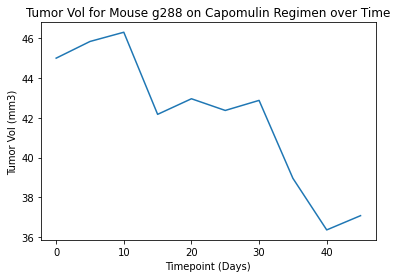

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# using random.choice to pick a random mouse from the list of cap mice
mouseID = random.choice(listcamice)
# applying a mask to get only the values for that mouse ID
capmousemask = (no_dups_df['Drug Regimen'] == 'Capomulin') & (no_dups_df['Mouse ID'] == mouseID)
only_cap_mouse = no_dups_df.loc[capmousemask, :]   

x_axis = only_cap_mouse.iloc[:, 5]
y_axis = only_cap_mouse.iloc[:, 6]


plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Vol (mm3)')
plt.title(f'Tumor Vol for Mouse {mouseID} on Capomulin Regimen over Time')

plt.savefig('rand_mouse_tum_vol.png', bbox_inches = "tight")
plt.show()

## Scatter Plots, Correlation and Regression

y = 0.895x + 22.764
correlation coefficient: 0.950524396185527


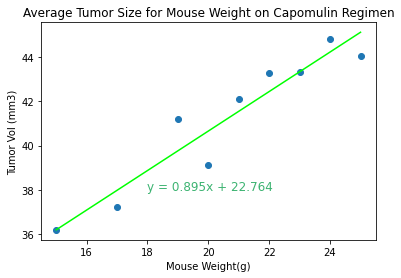

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# calling a mask for only that regime, grouping by weight, finding the mean for the tumour vol w/in the grouped by, dropping the index
avg_tum_vol_ca = no_dups_df[no_dups_df['Drug Regimen'] == 'Capomulin'].groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index(drop=False)

x_axis_weight = avg_tum_vol_ca.iloc[:, 0]
y_axis_vol = avg_tum_vol_ca.iloc[:, 1]

plt.scatter(x_axis_weight, y_axis_vol)
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Tumor Vol (mm3)')
plt.title('Average Tumor Size for Mouse Weight on Capomulin Regimen')
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_weight, y_axis_vol)
display_line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
lin_reg_mod = (slope * x_axis_weight) + intercept
print(display_line_eq)
print(f'correlation coefficient: {rvalue}')
plt.plot(x_axis_weight, lin_reg_mod, color='lime')
plt.annotate(display_line_eq, (18,38),fontsize=12,color="mediumseagreen")

plt.savefig('capomulin_avg_tum_size_linreg.png', bbox_inches = "tight")
plt.show()

In [36]:
len(no_dups_df[no_dups_df['Drug Regimen'] == 'Capomulin'])

230

y = 0.782x + 24.637
correlation coefficient: 0.9415006250247517


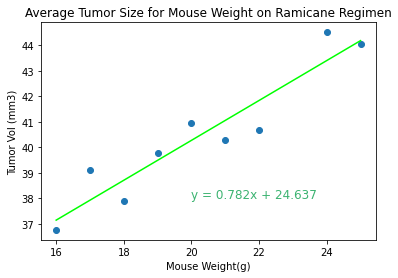

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Ramicane regimen, in order to compare with Capomulin
# repeating the above masking, groupby .mean(), index drop as for capomulin
avg_tum_vol_ra = no_dups_df[no_dups_df['Drug Regimen'] == 'Ramicane'].groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index(drop=False)

x_axis_weight = avg_tum_vol_ra.iloc[:, 0]
y_axis_vol = avg_tum_vol_ra.iloc[:, 1]

plt.scatter(x_axis_weight, y_axis_vol)
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Tumor Vol (mm3)')
plt.title('Average Tumor Size for Mouse Weight on Ramicane Regimen')
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Ramicane regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_weight, y_axis_vol)
display_line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
lin_reg_mod = (slope * x_axis_weight) + intercept
print(display_line_eq)
print(f'correlation coefficient: {rvalue}')
plt.plot(x_axis_weight, lin_reg_mod, color='lime')
plt.annotate(display_line_eq, (20,38),fontsize=12,color="mediumseagreen")
plt.show()

In [38]:
len(no_dups_df[no_dups_df['Drug Regimen'] == 'Ramicane'])

228

y = -0.304x + 61.82
correlation coefficient: -0.368421056071612


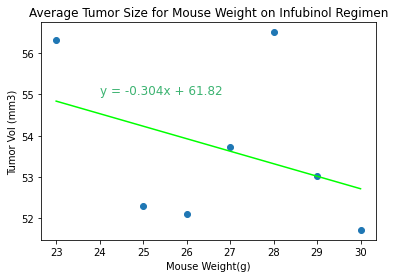

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Infubinol regimen, in order to compare with Capomulin
# repeating the above masking, groupby .mean(), index drop as for capomulin
avg_tum_vol_in = no_dups_df[no_dups_df['Drug Regimen'] == 'Infubinol'].groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index(drop=False)

x_axis_weight = avg_tum_vol_in.iloc[:, 0]
y_axis_vol = avg_tum_vol_in.iloc[:, 1]

plt.scatter(x_axis_weight, y_axis_vol)
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Tumor Vol (mm3)')
plt.title('Average Tumor Size for Mouse Weight on Infubinol Regimen')
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Infubinol regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_weight, y_axis_vol)
display_line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
lin_reg_mod = (slope * x_axis_weight) + intercept
print(display_line_eq)
print(f'correlation coefficient: {rvalue}')
plt.plot(x_axis_weight, lin_reg_mod, color='lime')
plt.annotate(display_line_eq, (24,55),fontsize=12,color="mediumseagreen")

plt.savefig('infubinol_avg_tum_size_linreg.png', bbox_inches = "tight")
plt.show()

In [40]:
len(no_dups_df[no_dups_df['Drug Regimen'] == 'Infubinol'])

178

y = 0.0x + 52.405
correlation coefficient: 0.0005738920945099235


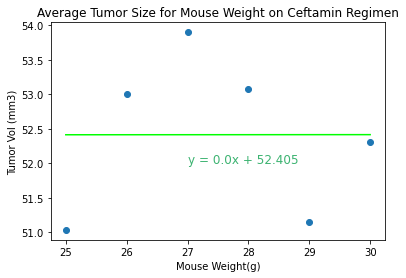

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen, in order to compare with Capomulin
# repeating the above masking, groupby .mean(), index drop as for capomulin
avg_tum_vol_ce = no_dups_df[no_dups_df['Drug Regimen'] == 'Ceftamin'].groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index(drop=False)

x_axis_weight = avg_tum_vol_ce.iloc[:, 0]
y_axis_vol = avg_tum_vol_ce.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_weight, y_axis_vol)
display_line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
lin_reg_mod = (slope * x_axis_weight) + intercept
print(display_line_eq)
print(f'correlation coefficient: {rvalue}')

plt.scatter(x_axis_weight, y_axis_vol)
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Tumor Vol (mm3)')
plt.title('Average Tumor Size for Mouse Weight on Ceftamin Regimen')
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Ceftamin regimen
plt.plot(x_axis_weight, lin_reg_mod, color='lime')
plt.annotate(display_line_eq, (27, 52),fontsize=12,color="mediumseagreen")
plt.show()

In [42]:
len(no_dups_df[no_dups_df['Drug Regimen'] == 'Ceftamin'])

178